# CMSC478 Machine Learning - Fall 2020 

## Instructor: Fereydoon Vafaei

### <font color="blue">Assignment-1: Binary Classification, Linear Regression and Logistic Regression</font>

Bryan Delas Penas GW90572

## Overview and Learning Objectives

So far, you've learned about the basics and fundamental concepts in Machine Learning such as supervised learning (e.g. classification and regression) vs unsupervised learning (e.g. clustering), overfitting, and model evaluation. You learned that two of the most common approaches in supervised learning are regression and classification. In this assignment, you are going to prcatice what you've learned so far by building ML models and applying them on data.

<b>Very Important Note:</b> Read ALL the instructions in this notebook very carefully. Careless reading and skipping lines would be a major source of making mistakes and losing points in your first assignment! Also notice that this assignment has three parts and includes multiple steps and questions. You're strongly recommended to get started early and plan to finish well before the due. Technical problems or other issues/questions on the due date or just a day before would NOT be accepted as an excuse to delay your submission. As stated in the policy, ALL assignments are indvidual work and students are strictly prohibited from collaboration on assignments. Students are responsible to debug the code and resolve any errors that may arise. Students should NOT share any answer, solution, or code/snippet in Piazza. Violations of these policies would be penalized accordingly.

Pedagogically, this assignment will help you:
- better understand the concepts you learned and how to use ML models in practice. 
- practice your Python skills
- pratice reading documentation. This is a very important skill in AI/ML/Data Science collaborative environments and teams.

So, let's get started!

## Part I - Binary Classification

Binary classification means you are classifying only two classes/labels. You are going to build a binary classifier that can classify breats cancer.

The first thing to do is downloading the [Indian Liver Patient Records](https://www.kaggle.com/uciml/indian-liver-patient-records) dataset. Read the feature specifications in Kaggle page to learn more about the data. The target label is `Dataset` which has two labels {1,2}. You should save the data in the same working directory as your notebook. Next, you should load the data using `pandas`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

In [2]:
# Load dataset using pd
liver_data = pd.read_csv('indian_liver_patient.csv')

# Show the first five rows
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [36]:
# 416 patients and 167 non-patients
liver_data.loc[liver_data['Dataset'] == 2].shape

(167, 11)

> Let's see what the type of `data` is.

In [37]:
type(liver_data)

pandas.core.frame.DataFrame

`DataFrame` is a data structure to contain datasets in pandas. Read pandas documentation to learn more about it [here](https://pandas.pydata.org/docs/user_guide/10min.html#min) and [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Since this is a binary classification (supervised learning) ML model, you have both the features and the labels for training and testing, and everything has been stored in `liver_data` DataFrame. 

## Preprocessing

Using [scikit-learn LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) module, change the `Gender` categorical values from {Female,Male} to {0,1} and the `Dataset` target label values from {1,2} to {0,1}.

In [38]:
# Encode categorical Gender values {Female, Male} to {0,1} and the Dataset labels {1,2} to {1,0}
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
liver_data['Gender'] = labelencoder.fit_transform(liver_data['Gender'])
liver_data['Dataset'] = labelencoder.fit_transform(liver_data['Dataset'])
print(liver_data.shape)
liver_data.head()

(583, 11)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [39]:
liver_data['Dataset'].unique()

array([0, 1], dtype=int64)

In [40]:
liver_data.loc[liver_data['Dataset'] == 0].shape

(416, 11)

>You should always check if your dataset has `NA` or `Null` values and decide about it, usually drop `NA`.

In [41]:
# Drop all NAs
liver_data.dropna(inplace=True)
liver_data.shape

(579, 11)

In [42]:
liver_data.isnull().sum()
liver_data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

> Now, you can extract features and labels from `liver_data`. Your classifier should attempt to predict `Dataset` binary classes so that is your target/label column.

In [43]:
# Organize data to feature vector X and label vector y
X = liver_data.drop(['Dataset'], axis=1)
y = liver_data['Dataset']

In [44]:
print("Features shape: ", X.shape)
print("Labels shape: ", y.shape)

Features shape:  (579, 10)
Labels shape:  (579,)


> Your `X` dataframe now only contains features, hence has 10 columns whereas `y` has now become a 1D vector containing labels only. Notice that `y` has 579 labels equal to the number of data records in the feature vector.

In [45]:
# X should no longer contain the Dataset column which is target/label column - i.e. the column to be predicted
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [46]:
# y should only contain class labels - Dataset target/label column
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Dataset, dtype: int64

In [47]:
y.unique()

array([0, 1], dtype=int64)

> When you have multiple features with different scales/ranges, you should consider standardizing them. There are different ways to standardize and to normalize the feature vector. One way is using scikit-learn modules.

In [48]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

As mentioned in the lectures, the data for supervised learning (both classification and regression) is split into training set and test set. We do this by importing another module from scikit learn.

In [49]:
from sklearn.model_selection import train_test_split

And now, we can split the data. The split ratio we are going to choose is 0.75 for training and 0.25 for testing, but we only need to specify one of them `test_size` here.

In [50]:
# Split the data to training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [51]:
# Check the shapes of X_train, X_test, y_train, y_test
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (434, 10)
y_train shape:  (434,)
X_test shape:  (145, 10)
y_test shape:  (145,)


And, we can now choose which classifier from the built-in classifiers in sklearn we want to use. We are going to use two classifiers that we've seen in the lectures so far: Stochastic Gradient Descent Classifier and Logistic Regression.

In [52]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Now complete the following cell. You may want to consult with the textbook code snippets. Notice that we use [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.fit) method for training and [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.predict) method for making predictions (testing). Click on the methods and read their documentation.

Enter your code in the blocks that start with `### START CODE HERE ###` and replace the ellipsis `...`

## <font color="red"> Required Coding

In [53]:
### START CODING HERE ###

# Create a SGDClassifier with random_state=0
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)

# Fit sgd_clf model on training set
sgd_clf = sgd_clf.fit(X_train, y_train)

# Create a LogisticRegression classifier with solver='liblinear'
log_reg_clf = LogisticRegression(solver = 'liblinear')

# Fit log_reg_clf on training set
log_reg_clf = log_reg_clf.fit(X_train, y_train)

# Create a RandomForestClassifier with max_depth=2
rf_clf = RandomForestClassifier(max_depth = 3, random_state = 0)

# Fit log_reg_clf on training set
rf_clf = rf_clf.fit(X_train, y_train)
### END CODING HERE ###

import warnings
warnings.filterwarnings("ignore")

C:\Users\Bryan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [63]:
# Now, make predictions on testing set and store the results

### START CODING HERE ###
y_pred_sgd = sgd_clf.predict(X_test)
y_pred_log_reg = log_reg_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
### END CODING HERE ###

In [64]:
print(type(y_pred_sgd), type(y_pred_log_reg))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [62]:
assert y_pred_sgd.shape == y_pred_log_reg.shape, "Prediction shapes don't match!"
print(y_pred_sgd.shape)
print(y_pred_log_reg.shape)

(145,)
(145,)


> Next, evaluate how your classifiers perform.

## <font color="red"> Required Coding

In [68]:
### START CODING HERE ###

# Import the necessary modules from sklearn for accuracy_score, precision_score and recall_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Compute the accuracy, precision and recall for SGD
acc_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
### END CODING HERE ###

# Print the accuracy, precision and recall for SGD 
print("SGD Accuracy: ", acc_sgd)
print("SGD Precision: ", precision_sgd)
print("SGD Recall: ", recall_sgd)

SGD Accuracy:  0.6620689655172414
SGD Precision:  0.5116279069767442
SGD Recall:  0.44


> Next, make similar computations for Logistic Regression.

In [69]:
### START CODING HERE ###

# Compute the accuracy, precision and recall for LogReg
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
### END CODING HERE ###

# Print the accuracy, precision and recall for LogReg
print("LogReg Accuracy: ", acc_log_reg)
print("LogReg Precision: ", precision_log_reg)
print("LogReg Recall: ", recall_log_reg)

LogReg Accuracy:  0.6827586206896552
LogReg Precision:  0.6666666666666666
LogReg Recall:  0.16


> Next, make similar computations for Random Forest.

In [70]:
### START CODING HERE ###

# Compute the accuracy, precision and recall for RF
acc_rf =accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
### END CODING HERE ###

# Print the accuracy, precision and recall for RF
print("RF Accuracy: ", acc_rf)
print("RF Precision: ", precision_rf)
print("RF Recall: ", recall_rf)

RF Accuracy:  0.6413793103448275
RF Precision:  0.4166666666666667
RF Recall:  0.1


> Next, the following cells show how you can plot ROC curve of logistic regression classifier using `fpr`, `tpr`, and `threshold` returned by [`metrics.roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and class probabilities using [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) method of [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [71]:
# Get class probabilities, fpr, tpr and threshold for Logistic Regression.
import sklearn.metrics as metrics
log_reg_probs = log_reg_clf.predict_proba(X_test)
log_reg_preds = log_reg_probs[:,1]
log_reg_fpr, log_reg_tpr, log_reg_threshold = metrics.roc_curve(y_test, log_reg_preds)
log_reg_roc_auc = metrics.auc(log_reg_fpr, log_reg_tpr)

Text(0.5, 0, 'False Positive Rate')

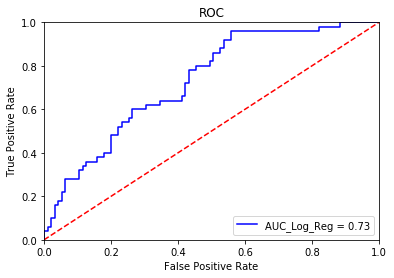

In [72]:
# Plot ROC curve for logistic regression classifier
plt.title('ROC')
plt.plot(log_reg_fpr, log_reg_tpr, 'b', label = 'AUC_Log_Reg = %0.2f' % log_reg_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Next, you should plot ROC curves of ALL THREE classifiers in ONE PLOT. Notice that some classifiers like SGD don't have `predict_proba` method, and in that case you can use [`decision_function`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function) method to get the scores.

## <font color="red"> Required Coding

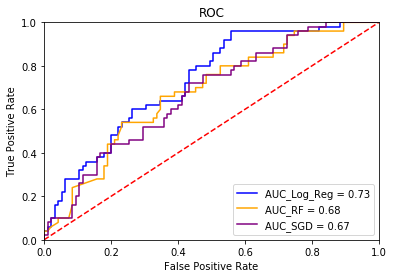

In [80]:
# Plot ROC for ALL THREE classifiers with different colors in one plot,
# and with AUC scores shown on the 'lower right' of the plot.

# Write as many number of lines of code as needed.
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.plot(log_reg_fpr, log_reg_tpr, 'b', label = 'AUC_Log_Reg = %0.2f' % log_reg_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

rf_probs = rf_clf.predict_proba(X_test)
rf_preds = rf_probs[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)
plt.plot(rf_fpr, rf_tpr, 'orange', label = 'AUC_RF = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')

sgd_preds = sgd_clf.decision_function(X_test)
sgd_fpr, sgd_tpr, sgd_threshold = metrics.roc_curve(y_test, sgd_preds)
sgd_roc_auc = metrics.auc(sgd_fpr, sgd_tpr)
plt.plot(sgd_fpr, sgd_tpr, 'purple', label = 'AUC_SGD = %0.2f' % sgd_roc_auc)
plt.legend(loc = 'lower right')


# Hint1: You may use LogisticRegression ROC curve as a reference for writing your code.
# Hint2: sgd with 'hinge' loss doesn't have predict_proba method,
# instead, you should directly use decision_function method to compute sgd_preds

### START CODING HERE ###
# Write as many number of lines of code as needed here.
### END CODING HERE ###

## Part I Questions

- Q1 [2 points] - What is the data type of `y_pred_sgd` and `y_pred_log_reg` and what are their shapes? Explain why you get such a shape for predictions. 


- Q2 [1 points]- Which classifier has the highest recall?


- Q3 [2 points]- Looking at ROC curves of Logistic Regression and SGD, and without seeing AUC scores, how would you determine which classifier has a better performance?

<font color=red>Enter your answers in the following markdown cell.</font>

- Your answers to Part I questions go HERE - below this line:

========================================================


YOUR Answers:

- Q1: They are numpy arrays, and the shape is ((145,)).


- Q2: SGD had the highest recall 


- Q3: By looking at which was the most consitit, which was blue

## Part II - Linear Regression Using Closed-Form Solution (Normal Equation)

In Part II, you're going to generate some data and then use closed-form solution for linear regression to fit the data.

Generate data points based on the following linear equation added by [the noise with “standard normal” distribution](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html). You may refer to the slides/textbook code snippets.

$$y = 5 + 4X + Gaussian Noise$$

## <font color="red"> Required Coding

In [22]:
X = 2 * np.random.rand(100, 1)

### START CODING HERE ###
# Compute y based on the linear equation given above and add random gaussian noise
y = 5 + 4 * X + np.random.rand(100,1)
### END CODING HERE ###

print(X[0])
print(y[0])

[1.75022429]
[12.84739883]


[0, 2, 0, 14]

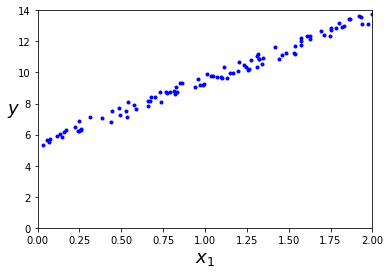

In [23]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 14])

In [25]:
### START CODING HERE ###
# add x0 = 1 to each instance using np.c_
X_b = np.c_[np.ones((100, 1)), X]

# Compute theta_best using normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
### END CODING HERE ###

theta_best

array([[5.39874182],
       [4.12869571]])

In [26]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [27]:
### START CODING HERE ###
# Make predictions on new data by computing the dot product of X_new_b and theta_best
y_predict = X_new_b.dot(theta_best)
### END CODING HERE ###

y_predict

array([[ 5.39874182],
       [13.65613325]])

[0, 2, 0, 15]

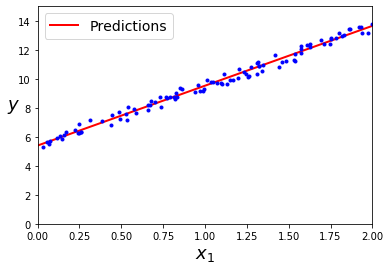

In [28]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])

## Part III - Regression Using Least Mean Square and RMSE

In Part III, you will implement three functions to build and use regression models: `train`, `use`, and `rmse` and then you apply them to some weather data.

Here are the specifications for these functions, which you must satisfy.

`model = train(X, T, learning_rate, n_epochs, verbose)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row. $N$ is the number of samples and $D$ is the number of variable values in
each sample.
* `T`: is an $N$ x $K$ matrix of desired target values for each sample.  $K$ is the number of output values you want to predict for each sample.
* `learning_rate`: is a scalar that controls the step size of each update to the weight values.
* `n_epochs`: is the number of epochs, or passes, through all $N$ samples, to take while updating the weight values.
* `verbose`: is True or False (default value) to control whether or not occasional text is printed to show the training progress.
* `model`: is the returned value, which must be a dictionary with the keys `'w'`, `'Xmeans'`, `'Xstds'`, `'Tmeans'` and `'Tstds'`.

`Y = use(X, model)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row, for which you want to predict the target values.
* `model`: is the dictionary returned by `train`.
* `Y`: is the returned $N$ x $K$ matrix of predicted values, one for each sample in `X`.

`result = rmse(Y, T)`
* `Y`: is an $N$ x $K$ matrix of predictions produced by `use`.
* `T`: is the $N$ x $K$ matrix of target values.
* `result`: is a scalar calculated as the square root of the mean of the squared differences between each sample (row) in `Y` and `T`.

<b>Hints:</b>
- Remember from regression performance measure that RMSE equation is:

$
\text{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m}\sum\limits_{i=1}^{m}\left(h(\mathbf{x}^{(i)}) - y^{(i)}\right)^2}
$

where $h(\mathbf{x}^{(i)})$ is your prediction versus $y^{(i)}$ target values. Notice that you will implement rmse twice, once in `train` function, and once as a separate function named `rmse`. In the `rmse` function when you work with vectorized form of Y and T, you can simply subtract and square them but you need to get the mean and the square root as well.<br>

- Also notice that in Python, you may use `@` as matrix multiplication operator between vectors. That is a simpler notation came in recent versions of Python 3.5+ as an alternative for [`numpy.matmul`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html). This would be used between two matrices whereas when you multiply a single scalar to a matrix such as `learning_rate` multiplied by a matrix, you may use `*` operator.


- During the training and in each iteration, weights would be updated as the following: 
`w = w + learning_rate * X[n:n + 1, :].T * error`

## <font color="red"> Required Coding

In [2]:
### START CODING HERE ###
def train(X, T, learning_rate, n_epochs, verbose=False):
    
    # Calculate means and standard deviations of each column in X and T
    Xmeans = np.mean(X)
    Xstds = np.std(X)
    Tmeans = np.mean(T)
    Tstds = np.std(T)
    
    # Use the means and standard deviations to standardize X and T
    X = (X - Xmeans) / Xstds
    T = (T - Tmeans) / Tstds
    
    # Insert the column of constant 1's as a new initial column in X
    X = np.insert(X,0,1,axis =1)

    # Initialize weights to be a numpy array of the correct shape and all zero values.
    n_samples, n_inputs = X.shape
    n_outputs = X.shape[1]
    w = np.zeros((n_outputs, n_inputs))
    for epoch in range(n_epochs):
        sqerror_sum = 0

        for n in range(n_samples):
            
            # Use current weight values to predict output for sample n (provided here), then
            # calculate the error, and
            # update the weight values.
            y = X[n:n + 1, :] @ w      # predicted value y for sample n
            error = (T[n:n + 1, :] - y)  
            w += learning_rate * X[n:n + 1, :].T * error
    
            # Add the squared error to sqerror_sum
            sqerror_sum += (error) ** 2
      
        if verbose and (n_epochs < 11 or (epoch + 1) % (n_epochs // 10) == 0):
            # Compute RMSE
            rmse = np.sqrt(sqerror_sum / n_samples)
            rmse = rmse[0, 0]  # because rmse is 1x1 matrix
            print(f'Epoch {epoch + 1} RMSE {rmse:.2f}')

    return {'w': w, 'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}
### END CODING HERE ###

In [3]:
### START CODING HERE ###
def use(X, model):
    # Standardize X using Xmeans and Xstds in model
    X = (X - model['Xmeans']) / model['Xstds']
    # Insert the column of constant 1's as a new initial column in X
    X = np.insert(X,0,1,axis =1)  
    # Predict output values using weights in model
    Y = X @ model['w']
    # Unstandardize the predicted output values using Tmeans and Tstds in model
    Y = (Y * model['Tstds']) + model['Tmeans']
    # Return the unstandardized output values
    return Y
### END CODING HERE ###

In [4]:
### START CODING HERE ### 
def rmse(A, B):
    n_inputs = A.shape[0]
    error_total = 0
    for n in range(n_inputs):
        error_total += (A[n:n + 1, :] - B[n:n + 1, :]) ** 2
        
    error_total = np.sqrt(error_total / n_inputs)
    return error_total
    #return result
### END CODING HERE ###

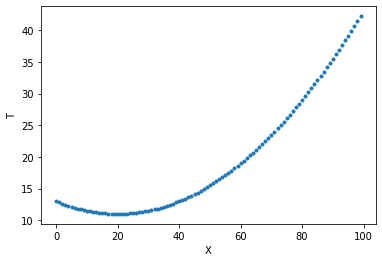

In [37]:
X = np.arange(0, 100).reshape(-1, 1)  # make X a 100 x 1 matrix
T = 0.5 + 0.3 * X + 0.005 * (X - 50) ** 2
plt.plot(X, T, '.')
plt.xlabel('X')
plt.ylabel('T');


In [38]:
model = train(X, T, 0.01, 50, verbose=True)
model

Epoch 5 RMSE 0.40
Epoch 10 RMSE 0.40
Epoch 15 RMSE 0.40
Epoch 20 RMSE 0.40
Epoch 25 RMSE 0.40
Epoch 30 RMSE 0.40
Epoch 35 RMSE 0.40
Epoch 40 RMSE 0.40
Epoch 45 RMSE 0.40
Epoch 50 RMSE 0.40


{'w': array([[-0.00576098, -0.00576098],
        [ 1.05433338,  1.05433338]]),
 'Xmeans': 49.5,
 'Xstds': 28.86607004772212,
 'Tmeans': 19.5175,
 'Tstds': 9.294919378348583}

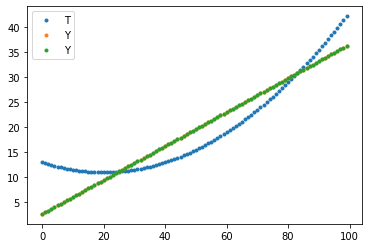

In [39]:
Y = use(X, model)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

In [40]:
result = rmse(Y, T)
result

array([[3.94139976, 3.94139976]])

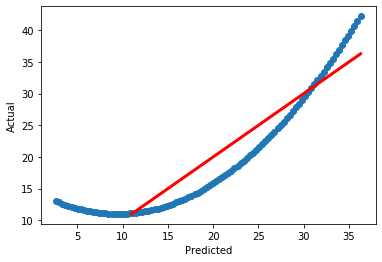

In [41]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)

In [3]:
# Just for testing if your implementation is correct
# You should get the provided correct output
X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
model = train(X, T, 0.001, 1000, True)

Epoch 100 RMSE 0.46
Epoch 200 RMSE 0.24
Epoch 300 RMSE 0.15
Epoch 400 RMSE 0.13
Epoch 500 RMSE 0.13
Epoch 600 RMSE 0.12
Epoch 700 RMSE 0.12
Epoch 800 RMSE 0.12
Epoch 900 RMSE 0.12
Epoch 1000 RMSE 0.12


## Weather Data

Now that your functions are working, we can apply them to some real data. You will use data
from  [Colorado State University's CoAgMet Station Daily Data Access](http://coagmet.colostate.edu/cgi-bin/dailydata_form.pl).

You can download the data file directly from the ML course GitHub repo [here](https://github.com/fereydoonvafaei/CMSC478-Fall2020/blob/master/data/weather.data)

## <font color="red"> Required Coding

Read in the data into variable `df` using `pandas.read_csv` like you did above for binary classification.
Notice that missing values in this dataset are indicated by the string `'***'`. This should be specified using `na_values` argument of `read_csv`. You must check if there are missing values using DataFrame `.isna().sum()` and drop them using DataFrame `.dropna()` method.

In [5]:
### START CODING HERE ### 
df = pd.read_csv("weather.data.csv",na_values = '***',delim_whitespace=True)

### END CODING HERE ###

In [6]:
### START CODING HERE ### 
# Check if there are na's in df
df.isna().sum()
### END CODING HERE ###

Year      0
Mo        0
Dy        0
tave     33
tmax     33
tmin     33
vp       33
rhmax    33
rhmin    33
pp       33
gust     33
dtype: int64

In [7]:
### START CODING HERE ### 
# Drop na
df = df.dropna()

### END CODING HERE ###

In [8]:
### START CODING HERE ### 
# Now, check again if there is any more na values left
df.isna().sum()
### END CODING HERE ###

Year     0
Mo       0
Dy       0
tave     0
tmax     0
tmin     0
vp       0
rhmax    0
rhmin    0
pp       0
gust     0
dtype: int64

In [9]:
# Check df columns
df.columns

Index(['Year', 'Mo', 'Dy', 'tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin',
       'pp', 'gust'],
      dtype='object')

In [10]:
df.head()

,Year,Mo,Dy,tave,tmax,tmin,vp,rhmax,rhmin,pp,gust
0,2000,1,1,3.477,11.858,-4.905,0.331,0.614,0.233,0.0,8.252
1,2000,1,2,0.363,6.415,-5.690,0.396,0.872,0.392,0.0,8.742
2,2000,1,3,-4.448,1.153,-10.049,0.185,0.573,0.274,0.0,10.741
3,2000,1,4,-2.465,6.562,-11.493,0.245,0.710,0.254,0.0,4.116
4,2000,1,5,1.558,6.723,-3.608,0.228,0.540,0.132,0.0,15.974


Next, create a linear model that predicts the next day's average temperature `tave` from the previous day's values of:
1. tave: average temperature
2. tmax: maximum temperature
3. tmin: minimum temperature
4. vp: vapor pressure
5. rhmax: maximum relative humidity
6. rhmin: minimum relative humidity
7. pp: precipitation
8. gust: wind gust speed

As a hint on how to do this, here is a list with these column names:

In [11]:
# List of column names
Xnames = ['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']

## <font color="red"> Required Coding

In [16]:
### START CODING HERE ### 
# Select those eight columns in Xnames from df and convert the result to a numpy array - Hint: use .values
data = df[['tave','tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']].to_numpy().astype(np.float)

# Assign X to be all columns and all but the last row - Hint: Review slicing notebook
X = data[:-1,:]

# Assign T to be just the first column (tave) and all but the first sample/row.
T = data[1:,0:1]

### END CODING HERE ###

> So now the first row (sample) in `X` is associated with the first row (sample) in `T` which is tave for the following day. Next, train the model. Run it several times with different `learning_rate` and `n_epochs` values to produce decreasing errors, or at least with an RMSE of less than 0.40

Epoch 100 RMSE 0.34
Epoch 200 RMSE 0.34
Epoch 300 RMSE 0.34
Epoch 400 RMSE 0.34
Epoch 500 RMSE 0.34
Epoch 600 RMSE 0.34
Epoch 700 RMSE 0.34
Epoch 800 RMSE 0.34
Epoch 900 RMSE 0.34
Epoch 1000 RMSE 0.34


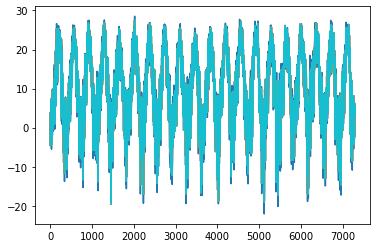

In [17]:
### START CODING HERE ### 

# Use the function train to train a model for the X and T data.
# Try different values for learning_rate and n_epochs
model = train(X, T, .00001, 1000, True)

# Use the use function
Y = use(X,model)
### END CODING HERE ###

plt.clf()
# Plot T versus predicted Y values to show how well the model is working
plt.plot(T)
plt.plot(Y)

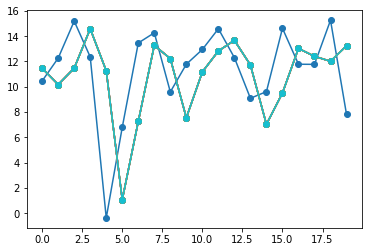

In [18]:
plt.plot(T[100:120], '-o')
plt.plot(Y[100:120], '-o')

> Print the weight values in the resulting model along with their corresponding variable names in `Xnames`. Use the relative magnitude of the weight values to discuss which input variables are most significant in predicting the changes in the tave values.

In [19]:
for i in range(len(Xnames)):
    print(f"{Xnames[i]:6} {model['w'][i,0]:9.5f}")

tave    -0.16050
tmax     0.27965
tmin     0.28234
vp       0.27696
rhmax    0.15198
rhmin    0.08697
pp       0.09936
gust     0.10189


### Part III Question

Anser the following question:

- Q4 [5 points] Whcih features (input variables) are most significant in predicting the changes in the tave values? Name top three. 

<font color=red>Enter your answer in the following markdown cell.</font>

- Your answers to Part III question go HERE below this line:

========================================================


YOUR Answer:

- Q4: Tmin, Tmax, vp where the highest value

## Grading

Assignment-1 has a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be easy-to-read.

The breakdown of the 100 points is as follows:

- Part I - 35 points
    - 30 points: Implementaion and correct outputs - breakdown as follows:
        - 20 points: classifiers, training, testing and model evaluation.
        - 10 points: correct plot of 2 ROC for 2 classifiers in one plot with different colors.

    - 5 points: Part I questions 


- Part II - 5 points
    - normal equation and correct outputs


- Part III - 60 points
    - 55 points: implementation
    - 5 points: Part III question

<b>Note: </b>Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A1.ipynb```. So, for me it would be `Vafaei-A1.ipynb`. Submit the completed notebook using the ```Assignment-1``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Monday October 5th, 11:59PM.</b></font>

### Acknowledgement

Special thanks to Professor Chuck Anderson from Colorado State University.